[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [6]:
# Cargar el dataset ISOLET.csv desde la carpeta Dataset
import pandas as pd
import numpy as np

# Cargar los datos del archivo ISOLET.csv
data = pd.read_csv('../Dataset/ISOLET.csv', header=None)
X = data.values

print(f"Dataset ISOLET cargado:")
print(f"Forma del dataset: {X.shape}")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Rango de valores: [{X.min():.3f}, {X.max():.3f}]")

Dataset ISOLET cargado:
Forma del dataset: (7797, 617)
Número de muestras: 7797
Número de características: 617
Rango de valores: [-1.000, 1.000]


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensionalidad para visualización (ISOLET tiene 617 dimensiones)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

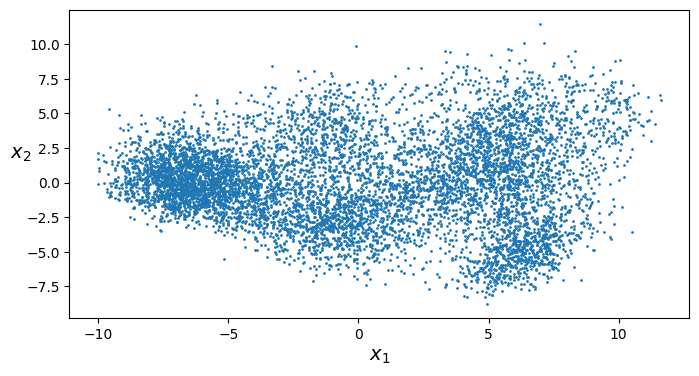

In [8]:
plt.figure(figsize=(8, 4))
plot_clusters(X_2d)
plt.show()

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [9]:
from sklearn.cluster import KMeans

k = 26
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([15,  1, 15, ..., 19, 10, 10])

In [10]:
kmeans.cluster_centers_

array([[-0.39006116,  0.19176147,  0.47852294, ...,  0.11306177,
         0.00621651, -0.34579388],
       [-0.39465979,  0.15933979,  0.37247794, ...,  0.05695258,
        -0.05299423, -0.3979266 ],
       [-0.50547345, -0.06316   ,  0.14114109, ...,  0.14576291,
         0.02523636, -0.34759564],
       ...,
       [-0.35411733,  0.16934667,  0.42667733, ...,  0.21821067,
         0.08038933, -0.32793867],
       [-0.55538968, -0.16983032, -0.05423806, ...,  0.03715097,
        -0.0452329 , -0.40449871],
       [-0.31020282,  0.27596419,  0.45894044, ...,  0.14621489,
         0.05291509, -0.30752797]])

In [11]:
X_new = np.random.uniform(-1.0, 1.0, (4, 617))
kmeans.predict(X_new)

array([16, 16, 16, 16])

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=100, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

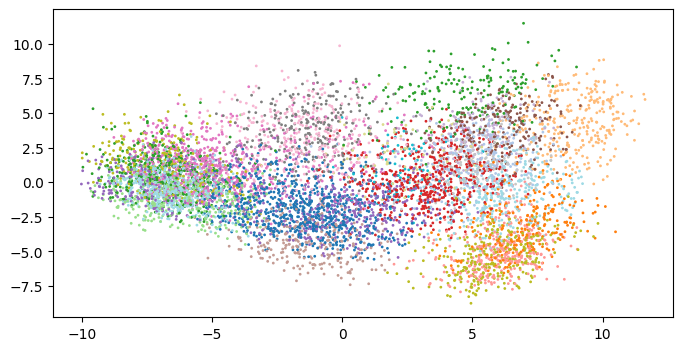

In [16]:
labels = kmeans.predict(X)
plt.figure(figsize=(8,4))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, s=1, cmap='tab20')
plt.show()



En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [19]:
kmeans.transform(X_new)

array([[19.19579617, 19.94912244, 19.69440532, 19.43642425, 19.77863306,
        19.34202245, 19.7699438 , 19.66757816, 19.25797746, 20.3799253 ,
        19.38922398, 19.31810482, 18.71854479, 19.00289266, 19.31363585,
        19.48195715, 17.61907956, 19.01626004, 18.68267907, 19.34110651,
        19.29726223, 19.97608868, 19.06680569, 19.27083692, 19.8316526 ,
        19.84656884],
       [18.63842664, 19.03693611, 18.96111666, 19.42652141, 19.15603051,
        18.98566135, 19.22888696, 19.05025122, 18.30236472, 19.95316969,
        18.95744765, 18.56194699, 18.79939534, 18.62892063, 19.07777524,
        19.10871984, 17.43277484, 18.13739829, 18.22871299, 18.9807257 ,
        19.0261035 , 19.58390624, 18.61498474, 18.75685319, 18.78418302,
        19.43137526],
       [19.82096297, 20.03385579, 20.15028511, 20.10302535, 20.08530973,
        20.06128431, 19.9076418 , 20.00462149, 19.71886521, 20.51091611,
        19.67537875, 19.76773884, 19.77149391, 20.03578541, 19.61260413,
       

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [20]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
                    #  algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=26, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=4)
# kmeans_iter2 = KMeans(n_clusters=26, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=26, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=26, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=26, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=26, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=26, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=26, n_init=1, random_state=5)

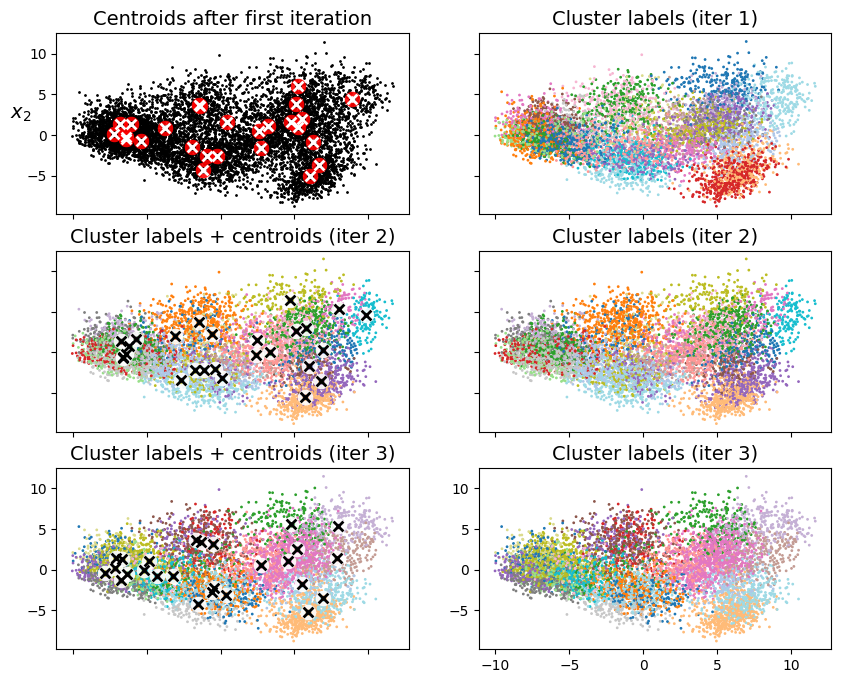

In [21]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_2d)
# Centroides proyectados a 2D con PCA
plot_centroids(pca.transform(kmeans_iter1.cluster_centers_), circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Centroids after first iteration", fontsize=14)

plt.subplot(322)
labels = kmeans_iter1.predict(X)  # predicción en 617D
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 1)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(323)
labels = kmeans_iter2.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plot_centroids(pca.transform(kmeans_iter2.cluster_centers_))
plt.title("Cluster labels + centroids (iter 2)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(324)
labels = kmeans_iter2.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 2)", fontsize=14)
plt.tick_params(labelleft=False, labelbottom=False)

plt.subplot(325)
labels = kmeans_iter3.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plot_centroids(pca.transform(kmeans_iter3.cluster_centers_))
plt.title("Cluster labels + centroids (iter 3)", fontsize=14)
plt.tick_params(labelbottom=False)

plt.subplot(326)
labels = kmeans_iter3.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.title("Cluster labels (iter 3)", fontsize=14)
plt.show()


Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [22]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

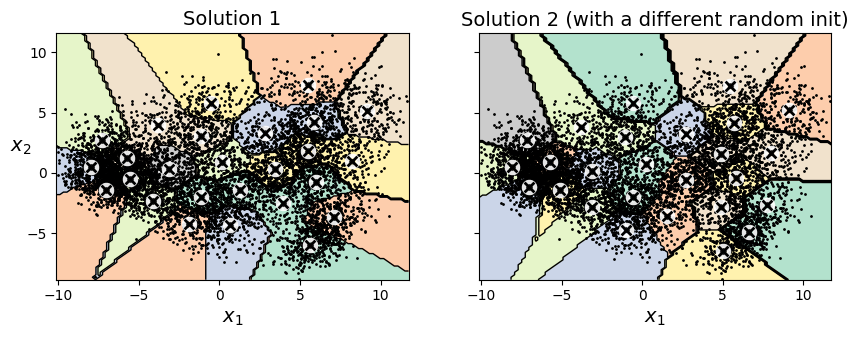

In [23]:
kmeans_rnd_init1 = KMeans(n_clusters=26, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=26, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X_2d,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [24]:
kmeans_rnd_10_inits = KMeans(n_clusters=26, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=26, n_init=10,
       random_state=11)

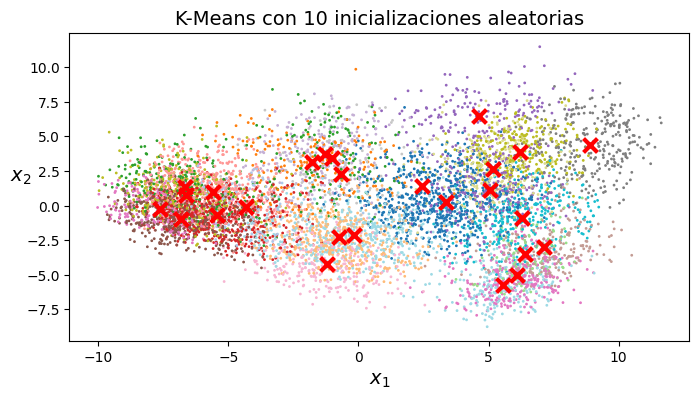

In [27]:
# Visualizar los resultados del clustering
labels = kmeans_rnd_10_inits.predict(X)
plt.figure(figsize=(8, 4))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=1, cmap='tab20')
plt.scatter(pca.transform(kmeans_rnd_10_inits.cluster_centers_)[:, 0], 
           pca.transform(kmeans_rnd_10_inits.cluster_centers_)[:, 1], 
           c='red', marker='x', s=100, linewidth=3)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("K-Means con 10 inicializaciones aleatorias", fontsize=14)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [30]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 26
n_init = 10
n_iterations = 50
batch_size = 200
init_size = 1000
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [32]:
best_kmeans.score(X)

-448866.28236351785

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.08867402115746782

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

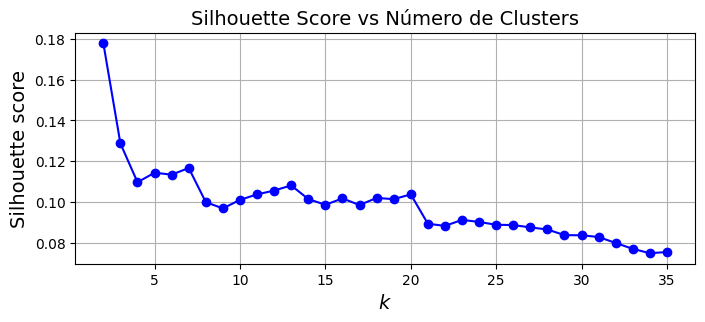

In [34]:
max_k = 35  # Hasta 35 clusters para analizar alrededor de las 26 letras
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, max_k + 1)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Generar eje x para k de 2 hasta max_k
ks = list(range(2, max_k + 1))

# plt.figure(figsize=(8, 3))
# plt.plot(ks, silhouette_scores, "bo-")
# # plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()

plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Silhouette Score vs Número de Clusters", fontsize=14)
plt.grid(True)
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

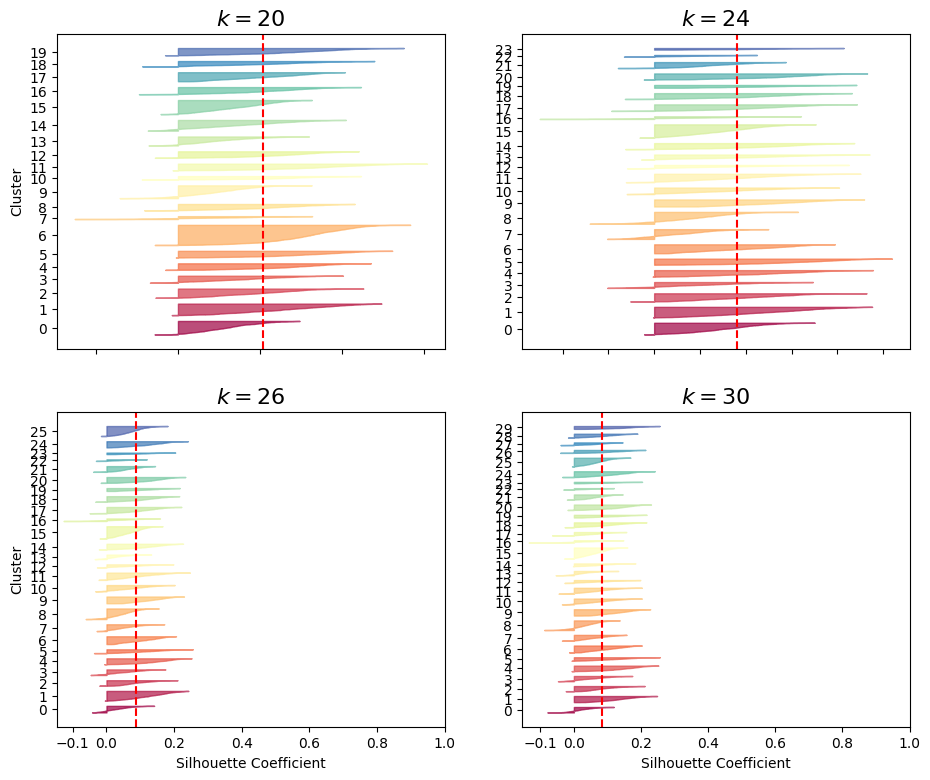

In [35]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

# for k in (3, 4, 5, 6):
#     plt.subplot(2, 2, k - 2)

valid_ks = [k for k in (20, 24, 26, 30) if k <= len(kmeans_per_k)]  # Valores alrededor de 26 letras


for plot_idx, k in enumerate(valid_ks):
    plt.subplot(2, 2, plot_idx + 1)  # enumerar para evitar errores


    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (20, 26):
        plt.ylabel("Cluster")

    if k in (26, 30):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

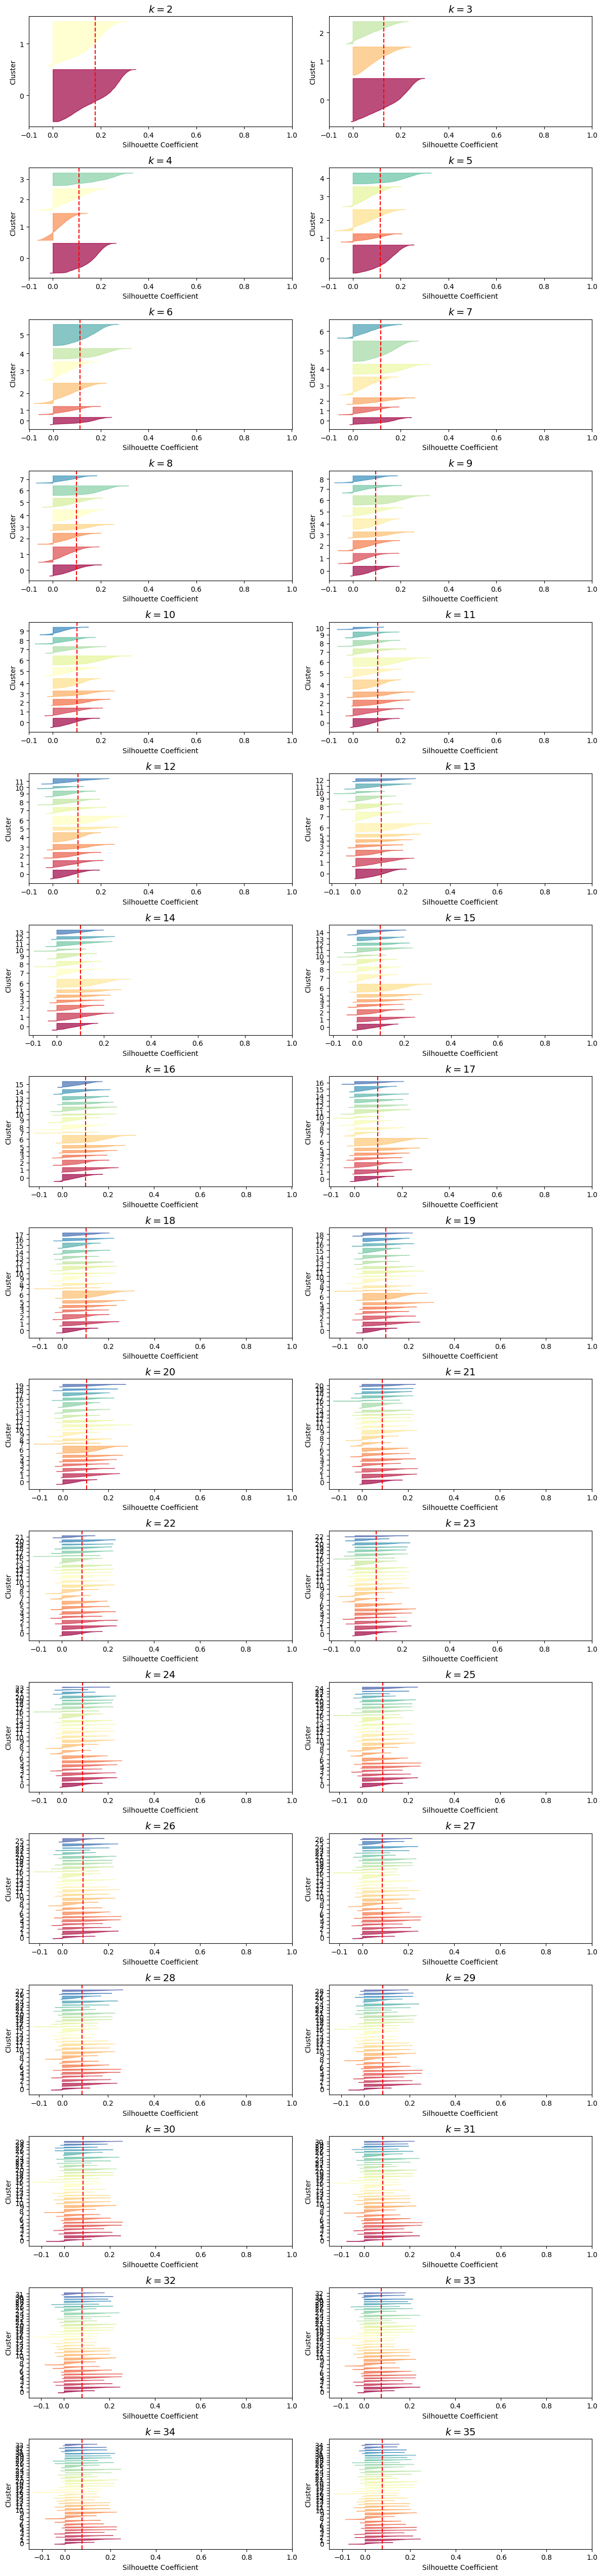

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# Definimos rango de k dinámico (hasta 35 por tu dataset)
max_k = 26
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, max_k + 1)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

n_ks = len(kmeans_per_k)  # total de modelos (aquí 34: k=2..35)
plt.figure(figsize=(12, 3 * ((n_ks + 1) // 2)))  # alto dinámico según cantidad de subplots

for plot_idx, (k, model) in enumerate(zip(range(2, max_k + 1), kmeans_per_k), start=1):
    plt.subplot((n_ks + 1) // 2, 2, plot_idx)

    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster")

    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    # línea roja con el promedio de silhouette
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=14)

plt.tight_layout()
plt.show()


### K-Means para aprendizaje semi-supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset ISOLET y usando *K-Means*. Usaremos el dataset que ya tenemos cargado.

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

# Simular etiquetas para ISOLET (las 26 letras del alfabeto)
# En un caso real estas etiquetas no estarían disponibles
y_isolet = np.random.randint(0, 26, len(X))  # Etiquetas simuladas de 0 a 25 (A-Z)

# Dividir el dataset ISOLET en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_isolet, test_size=0.25, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (5847, 617)
Datos de prueba: (1950, 617)


Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo las características de audio sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas muestras más representativas de cada grupo.

In [43]:
from sklearn.cluster import KMeans

k = 26
kmeans_semi = KMeans(n_clusters=k, random_state=42)
X_isolet_dist = kmeans_semi.fit_transform(X_train)

In [44]:
print(f"Distancias a centroids: {X_isolet_dist.shape}")
print("Primeras 5 filas de distancias:")
print(X_isolet_dist[:5])

Distancias a centroids: (5847, 26)
Primeras 5 filas de distancias:
[[12.80269618 11.01948525 12.35267326  5.96259196 14.40057143 17.29439481
   9.17163737 14.81998736  9.95124714 16.00450805 12.16221775 12.66528837
  14.77447728  8.92649106  8.54747228  7.99209656 13.99033294  7.31447632
   8.98612015 12.27701572 11.52245875 16.41762697 14.28013639 12.63733065
  13.81194015 10.2934879 ]
 [11.3069914  14.30375661  9.38231554 12.24772133 12.27604479 11.91334862
  13.74038489 11.9006242  13.09862502  9.86076663 12.02646647 13.38907573
  10.51370107 10.45820801 14.05252259 13.85942249 10.89022024 12.91353845
  13.91103822 12.16842112 11.03263764 11.15563184 12.59943815  5.93375598
   9.77257041 11.46968575]
 [11.93520108  8.54620104 12.41851714  8.39877141 15.38039633 17.3119091
   9.69706184 15.27488577 11.71360031 14.96105963 10.97997827 13.16575169
  14.19722746  9.73323536 10.57939181  9.34263929 14.43244754  9.81982192
   6.97858916 12.85558785 11.08306967 16.40958861 15.08043521 11.8

In [45]:
# Encontrar las muestras más representativas (más cercanas a cada centroide)
idxs = np.argmin(X_isolet_dist, axis=0)
X_representative_samples = X_train[idxs]

In [46]:
print(f"Muestras representativas: {X_representative_samples.shape}")
print("Características de las primeras 3 muestras representativas:")
print(X_representative_samples[:3, :10])  # Mostrar solo las primeras 10 características

Muestras representativas: (26, 617)
Características de las primeras 3 muestras representativas:
[[-0.1092  0.4154  0.8556  1.      0.4542  0.0246  0.081  -0.074  -0.1022
  -0.1972]
 [-0.5172  0.0532  0.3416  0.279  -0.2664 -0.4546 -0.4796 -0.467  -0.6176
  -0.6112]
 [-0.3688  0.0416  0.1506  0.2626  0.67    0.5638  0.5868  0.2798  0.1306
   0.0732]]


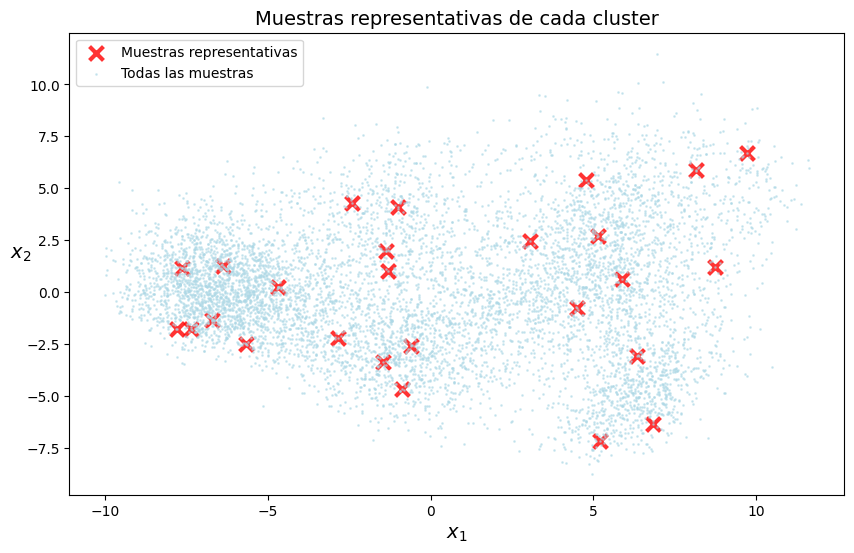

Se encontraron 26 muestras representativas


In [62]:
# Visualizar las muestras representativas proyectadas en 2D
import matplotlib.pyplot as plt

# Proyectar las muestras representativas a 2D
X_rep_2d = pca.transform(X_representative_samples)

plt.figure(figsize=(10, 6))
plt.scatter(X_rep_2d[:, 0], X_rep_2d[:, 1], c='red', s=100, alpha=0.8, 
           marker='x', linewidth=3, label='Muestras representativas')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='lightblue', s=1, alpha=0.5, label='Todas las muestras')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("Muestras representativas de cada cluster", fontsize=14)
plt.legend()
plt.show()

print(f"Se encontraron {len(X_representative_samples)} muestras representativas")

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas simuladas :p).

In [63]:
y_representative_samples = y_train[idxs]
print(f"Etiquetas de las muestras representativas: {y_representative_samples}")

Etiquetas de las muestras representativas: [ 0 24  3 14  4  7 20  5  9 24 18  7 21  6  9  8  2 10 23 10 17  4  7  4
  2 24]


Y entrenaremos un clasificador usando estas muestras representativas.

In [64]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
print("Entrenando con muestras representativas...")
log_reg2.fit(X_representative_samples, y_representative_samples)
accuracy_rep = log_reg2.score(X_test, y_test)
print(f"Precisión con muestras representativas: {accuracy_rep:.4f}")

Entrenando con muestras representativas...
Precisión con muestras representativas: 0.0313
Precisión con muestras representativas: 0.0313


Como puedes observar hemos obtenido una precisión habiendo anotado simplemente 50 muestras de audio, pero aquellas más representativas. Entrenar el mismo modelo con 50 muestras aleatorias nos daría peores resultados.

In [50]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
print("Entrenando con muestras aleatorias...")
log_reg.fit(X_train[:50], y_train[:50])
accuracy_random = log_reg.score(X_test, y_test)
print(f"Precisión con muestras aleatorias: {accuracy_random:.4f}")
print(f"Mejora usando muestras representativas: {accuracy_rep - accuracy_random:.4f}")

Entrenando con muestras aleatorias...
Precisión con muestras aleatorias: 0.0292
Mejora usando muestras representativas: 0.0021


Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [52]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans_semi.labels_==i] = y_representative_samples[i]

In [53]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: total: 1.28 s
Wall time: 1.01 s


0.03538461538461538

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las características de audio estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la muestra más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

### Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [65]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.67948634, 0.70084424, 0.70479709, 0.71453097, 0.71982566,
       0.73938277, 0.73989633, 0.74046557, 0.75246044, 0.75276464])

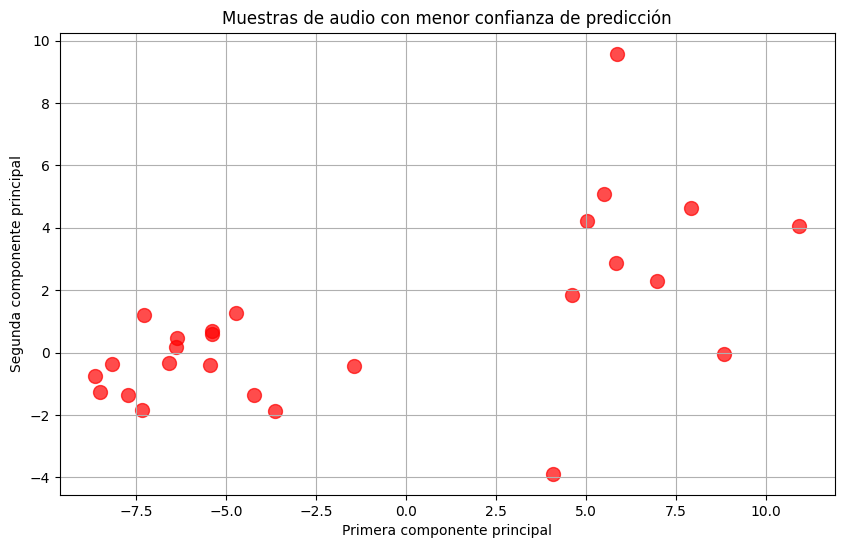

In [67]:
X_lowest = X_train[:1000][sorted_ixs[:k]]
# Visualizamos las muestras con menor confianza usando PCA
X_lowest_pca = pca.transform(X_lowest)
plt.figure(figsize=(10, 6))
plt.scatter(X_lowest_pca[:, 0], X_lowest_pca[:, 1], c='red', s=100, alpha=0.7)
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal') 
plt.title('Muestras de audio con menor confianza de predicción')
plt.grid(True)
plt.show()

In [68]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array([11, 10,  1,  8, 17, 15, 25, 14, 20, 14, 15, 25,  4,  8, 18,  5, 25,
        7, 13, 20, 17, 19, 16,  9, 17, 12])

In [69]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [70]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: total: 1.47 s
Wall time: 999 ms


0.035897435897435895

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.

## Otras técnicas de aprendizaje no supervisado

Otras técnicas muy usadas de aprendizaje no supervisado son

### DBSCAN

Este algoritmo define *clusters* como regiones continuas de alta densidad, agrupando progresivamente muestras cercanas entre ellas.

In [71]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [72]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [73]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [74]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([0, 1], dtype=int64)

In [75]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

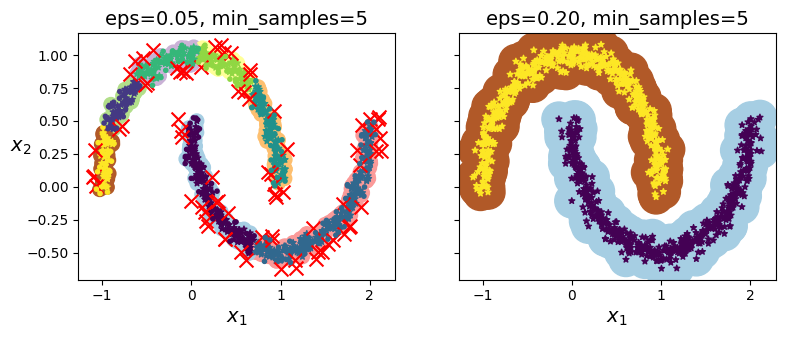

In [76]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Podemos considerar las muestras fuera de los grupos como anomalías, o bien usar un clasificador de vecinos cercanos para clasificar nuevas muestras.

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [78]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [79]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

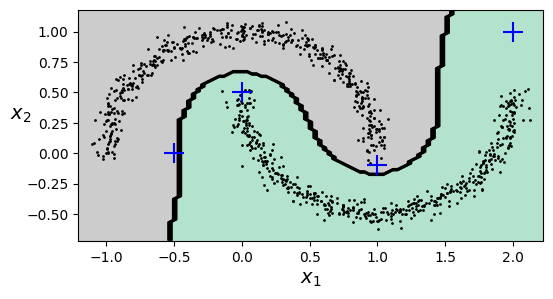

In [80]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

### Gaussian Mixtures

Los modelos de *Gaussian Mixtures* son modelos probabilísticos que asumen que las muestras del conjunto de datos provienen de la mezcla de distribuciones Gaussianas cuyos parámetros son desconocidos.

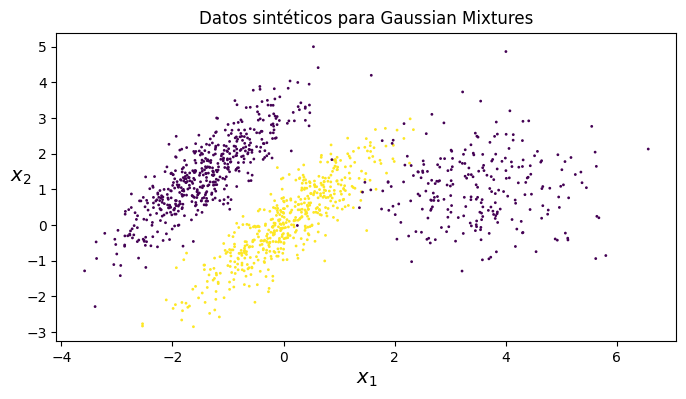

In [82]:
from sklearn.datasets import make_blobs

# Crear datos sintéticos para demostrar Gaussian Mixtures
X1_gauss, y1_gauss = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1_gauss = X1_gauss.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2_gauss, y2_gauss = make_blobs(n_samples=250, centers=1, random_state=42)
X2_gauss = X2_gauss + [6, -8]
X_gauss = np.r_[X1_gauss, X2_gauss]
y_gauss = np.r_[y1_gauss, y2_gauss]

# Visualizar los datos sintéticos
plt.figure(figsize=(8, 4))
plot_clusters(X_gauss, y_gauss)
plt.title("Datos sintéticos para Gaussian Mixtures")
plt.show()

In [83]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_gauss)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [84]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

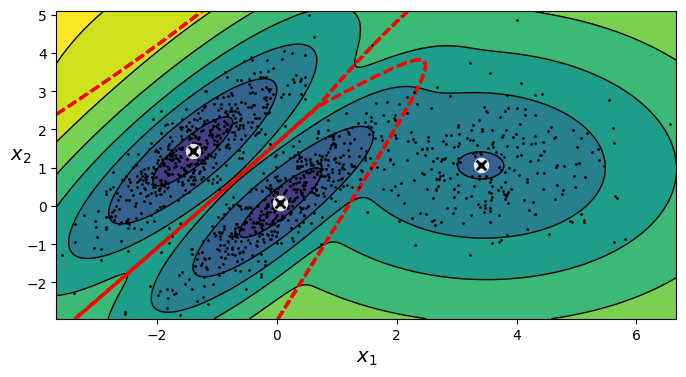

In [85]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_gauss)
plt.show()

In [86]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [87]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [88]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [89]:
gm.predict(X)

array([2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2,

In [90]:
gm.predict_proba(X)

array([[7.42593173e-06, 1.40607360e-03, 9.98586500e-01],
       [3.82859384e-15, 4.22897107e-01, 5.77102893e-01],
       [2.68792029e-14, 2.14701646e-01, 7.85298354e-01],
       ...,
       [5.84029029e-21, 9.98786436e-01, 1.21356359e-03],
       [4.51362535e-01, 1.39315487e-03, 5.47244310e-01],
       [1.06374079e-09, 1.81826526e-02, 9.81817346e-01]])

Estos modelos son generativos, por lo que permiten crear nuevas muestras.

In [92]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [93]:
y_new

array([0, 0, 1, 1, 1, 2])

Definiendo un valor límite podemos detectar anomalías en los datos.

In [94]:
densities = gm.score_samples(X_gauss)
density_threshold = np.percentile(densities, 4)
anomalies = X_gauss[densities < density_threshold]

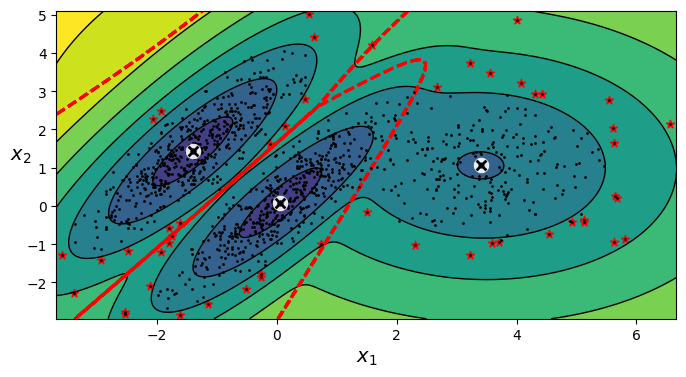

In [95]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_gauss)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de *Bayesian Gaussian Mixtures*, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

In [96]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_gauss)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [97]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

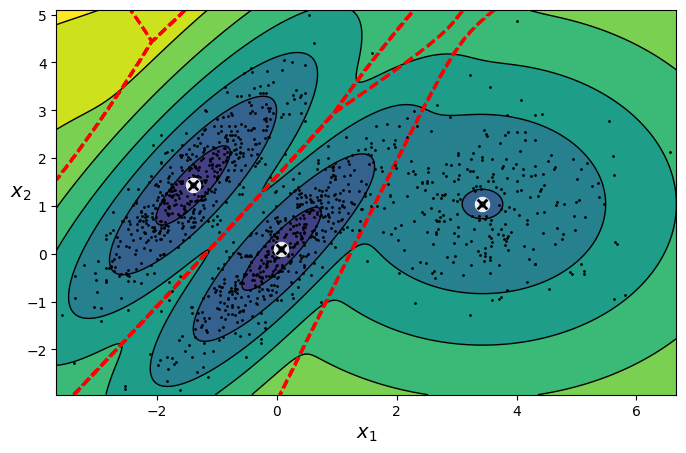

In [98]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_gauss)
plt.show()

## Resumen

En este post hemos introducido el concepto del aprendizaje no supervisado, modelos de *Machine Learning* que podemos usar cuando nuestros datos no están etiquetados. Hemos visto el algoritmo de *K-Means* y aplicado su uso en aprendizaje semi-supervisado y *active learning*. Por último, hemos introducido otros métodos útiles para detección de anomalías como *DBSCAN* o *Gaussian Mixtures*.